In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    f1_score,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pylab import rcParams
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


In [2]:
df = pd.read_csv('neo.csv')
df2 = pd.read_csv('neo_v2.csv')

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [5]:
df2.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
df.compare(df2)
##oba pliki są identyczne

Empty DataFrame
Columns: []
Index: []

In [9]:
df['est_diameter_avg'] = (df['est_diameter_max'] + df['est_diameter_min']) / 2
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,0.043007
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,0.027136
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,0.051706
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,0.011845


In [10]:
X = df.drop(columns=['est_diameter_min', 'est_diameter_max', 'id', 'name', 'orbiting_body', 'sentry_object', 'hazardous'], axis=1)

In [11]:
X 

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg
0,13569.249224,5.483974e+07,16.73,1.938843
1,73588.726663,6.143813e+07,20.00,0.430073
2,114258.692129,4.979872e+07,17.83,1.168268
3,24764.303138,2.543497e+07,22.20,0.156150
4,42737.733765,4.627557e+07,20.09,0.412613
...,...,...,...,...
90831,52078.886692,1.230039e+07,25.00,0.043007
90832,46114.605073,5.432121e+07,26.00,0.027136
90833,7566.807732,2.840077e+07,24.60,0.051706
90834,69199.154484,6.869206e+07,27.80,0.011845


In [12]:
cols = ['relative_velocity', 'miss_distance', 'absolute_magnitude', 'est_diameter_avg']
std_scale = preprocessing.StandardScaler().fit(X[cols])
df_std = std_scale.transform(X[cols])

In [13]:
df_std

array([[-1.36391312,  0.79515317, -2.34863167,  3.58728394],
       [ 1.00903999,  1.09035748, -1.21873486,  0.46352912],
       [ 2.61698337,  0.56962356, -1.96854406,  1.9918872 ],
       ...,
       [-1.60122795, -0.38769729,  0.37072244, -0.31984203],
       [ 0.83549218,  1.41489044,  1.47643186, -0.4023702 ],
       [-0.83194291,  1.01582267,  0.20486602, -0.29335902]])

In [14]:
scaled_features_df = pd.DataFrame(df_std, index=df.index, columns=cols)

In [15]:
scaled_features_df

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg
0,-1.363913,0.795153,-2.348632,3.587284
1,1.009040,1.090357,-1.218735,0.463529
2,2.616983,0.569624,-1.968544,1.991887
3,-0.921301,-0.520384,-0.458560,-0.103601
4,-0.210697,0.412001,-1.187637,0.427378
...,...,...,...,...
90831,0.158619,-1.108010,0.508936,-0.337852
90832,-0.077187,0.771954,0.854470,-0.370713
90833,-1.601228,-0.387697,0.370722,-0.319842
90834,0.835492,1.414890,1.476432,-0.402370


## trening XGBoost + stratify - ze stratify jest gorzej

In [ ]:
y = df['hazardous']

In [39]:
params = dict(n_estimators=100, max_depth=3)
results = []
for ix in tqdm(range(10)):
    
    x_train, x_test, y_train, y_test = train_test_split(
        scaled_features_df, y, test_size=0.2, random_state=0, stratify = y)
    
    for model in [xgb.XGBClassifier, RandomForestClassifier]:   
        model = model(**params)
        model.fit(x_train, y_train)
        y_pred = model.predict_proba(x_test)[:, 1]
        y_pred_labels = np.where(y_pred > 0.5, 1, 0)
        results.append({
            "iter": ix,
            "model": model.__class__.__name__,
            "auc": roc_auc_score(y_test, y_pred),
            "accuracy": accuracy_score(y_test, y_pred_labels),
            "f1": f1_score(y_test, y_pred_labels),
            "recall" : recall_score (y_test, y_pred_labels)
            })

    

100%|██████████| 10/10 [00:59<00:00,  6.00s/it]


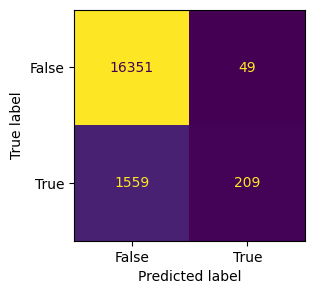

In [40]:
fig, ax = plt.subplots(figsize=(5, 3))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_labels, labels=model.classes_, ax=ax, colorbar=False)
plt.show()

In [19]:
# trening xgboost class i random forrest 
results

[{'iter': 0,
  'model': 'XGBClassifier',
  'auc': 0.9255487459993379,
  'accuracy': 0.9145750770585646,
  'f1': 0.29582577132486393,
  'recall': 0.18438914027149322},
 {'iter': 0,
  'model': 'RandomForestClassifier',
  'auc': 0.9098838255987197,
  'accuracy': 0.9114376926464113,
  'f1': 0.20385947550717468,
  'recall': 0.1165158371040724},
 {'iter': 1,
  'model': 'XGBClassifier',
  'auc': 0.9255487459993379,
  'accuracy': 0.9145750770585646,
  'f1': 0.29582577132486393,
  'recall': 0.18438914027149322},
 {'iter': 1,
  'model': 'RandomForestClassifier',
  'auc': 0.9113015430140161,
  'accuracy': 0.9114376926464113,
  'f1': 0.2116609505144537,
  'recall': 0.12217194570135746},
 {'iter': 2,
  'model': 'XGBClassifier',
  'auc': 0.9255487459993379,
  'accuracy': 0.9145750770585646,
  'f1': 0.29582577132486393,
  'recall': 0.18438914027149322},
 {'iter': 2,
  'model': 'RandomForestClassifier',
  'auc': 0.9101012581392782,
  'accuracy': 0.9114376926464113,
  'f1': 0.2108876900441393,
  'recal

In [20]:
results_df = pd.DataFrame.from_records(results)
results_df

,iter,model,auc,accuracy,f1,recall
0,0,XGBClassifier,0.925549,0.914575,0.295826,0.184389
1,0,RandomForestClassifier,0.909884,0.911438,0.203859,0.116516
2,1,XGBClassifier,0.925549,0.914575,0.295826,0.184389
3,1,RandomForestClassifier,0.911302,0.911438,0.211661,0.122172
4,2,XGBClassifier,0.925549,0.914575,0.295826,0.184389
5,2,RandomForestClassifier,0.910101,0.911438,0.210888,0.121606
6,3,XGBClassifier,0.925549,0.914575,0.295826,0.184389
7,3,RandomForestClassifier,0.910625,0.911383,0.212329,0.122738
8,4,XGBClassifier,0.925549,0.914575,0.295826,0.184389
9,4,RandomForestClassifier,0.910044,0.911493,0.210991,0.121606


In [21]:
metrics_df = results_df.groupby("model").mean().reset_index().drop(columns=["iter"]).melt(id_vars=["model"], var_name="metric")
metrics_df

,model,metric,value
0,RandomForestClassifier,auc,0.910733
1,XGBClassifier,auc,0.925549
2,RandomForestClassifier,accuracy,0.911449
3,XGBClassifier,accuracy,0.914575
4,RandomForestClassifier,f1,0.210592
5,XGBClassifier,f1,0.295826
6,RandomForestClassifier,recall,0.121380
7,XGBClassifier,recall,0.184389


In [22]:
px.bar(metrics_df, x="metric", y="value", color="model", barmode="group")

## XGBoost + z najlepszymi param. z hyperopta

In [23]:
params = dict(n_estimators=100, learning_rate = 0.3460616896203331, max_depth = 4)
results = []

x_train, x_test, y_train, y_test = train_test_split(
    scaled_features_df, y, test_size=0.2, random_state=0, stratify = y)
    
  
xgb_best_params = xgb.XGBClassifier(**params)
xgb_best_params.fit(x_train, y_train)
y_pred = xgb_best_params.predict_proba(x_test)[:, 1]
y_pred_labels = np.where(y_pred > 0.5, 1, 0)
results.append({
    "auc": roc_auc_score(y_test, y_pred),
    "accuracy": accuracy_score(y_test, y_pred_labels),
    "f1": f1_score(y_test, y_pred_labels),
    "recall" : recall_score (y_test, y_pred_labels)
        })

    

In [24]:
results

[{'auc': 0.9279518161626752,
  'accuracy': 0.9157309555261999,
  'f1': 0.32880315651030245,
  'recall': 0.21210407239819004}]

In [25]:
results_df = pd.DataFrame.from_records(results)
results_df

,auc,accuracy,f1,recall
0,0.927952,0.915731,0.328803,0.212104


## obniżona granica, od której uznajemy hazardous=1

In [26]:
params = dict(n_estimators=100, learning_rate = 0.3460616896203331, max_depth = 4)
results = []

x_train, x_test, y_train, y_test = train_test_split(
    scaled_features_df, y, test_size=0.2, random_state=0, stratify = y)
    
  
xgb_best_params = xgb.XGBClassifier(**params)
xgb_best_params.fit(x_train, y_train)
y_pred = xgb_best_params.predict_proba(x_test)[:, 1]
y_pred_labels = np.where(y_pred > 0.2, 1, 0)
results.append({
    "auc": roc_auc_score(y_test, y_pred),
    "accuracy": accuracy_score(y_test, y_pred_labels),
    "f1": f1_score(y_test, y_pred_labels),
    "recall" : recall_score (y_test, y_pred_labels),
    "pres": precision_score (y_test, y_pred_labels)
        })

    

In [28]:
results

[{'auc': 0.9279518161626752,
  'accuracy': 0.830856450902686,
  'f1': 0.5115243999364171,
  'recall': 0.9100678733031674,
  'pres': 0.35573734247181077}]

In [29]:
y_pred_labels

array([0, 1, 1, ..., 0, 0, 0])

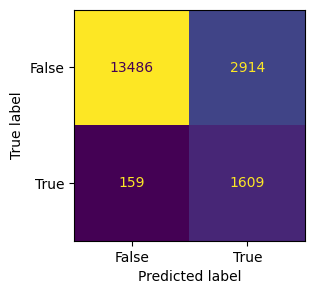

In [30]:
fig, ax = plt.subplots(figsize=(5, 3))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_labels, labels=xgb_best_params.classes_, ax=ax, colorbar=False)
plt.show()

In [34]:
xgb_cl = xgb.XGBClassifier(
    n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric="error", random_state=0, class_weight='balanced'
)

c:\Users\joann\anaconda3\envs\Joanna\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [35]:
probas = xgb_best_params.predict_proba(x_test)

In [36]:
positive_proba = probas[:, 1]
roc_auc_score(
    y_test, positive_proba)

0.9279518161626752

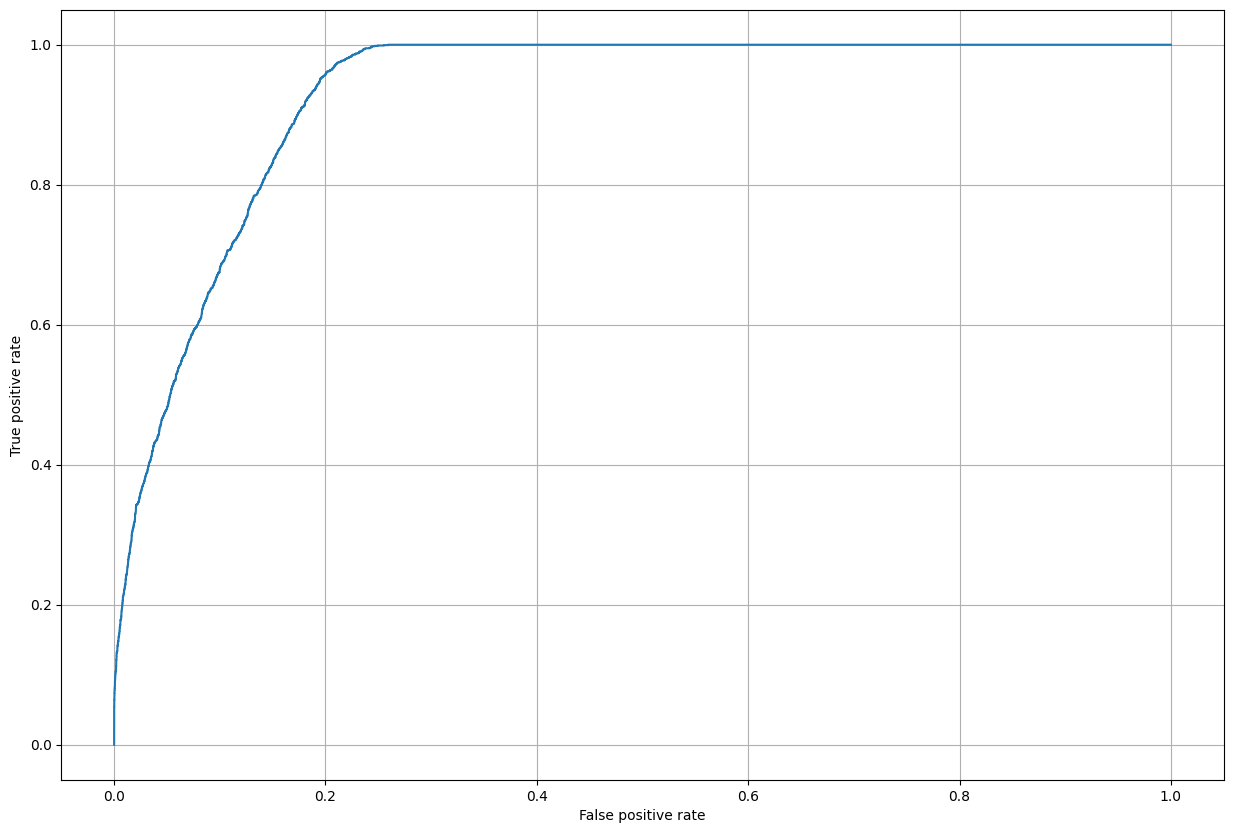

In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, positive_proba) 

plt.figure(figsize=(15, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()

Text(0, 0.5, 'Precision')

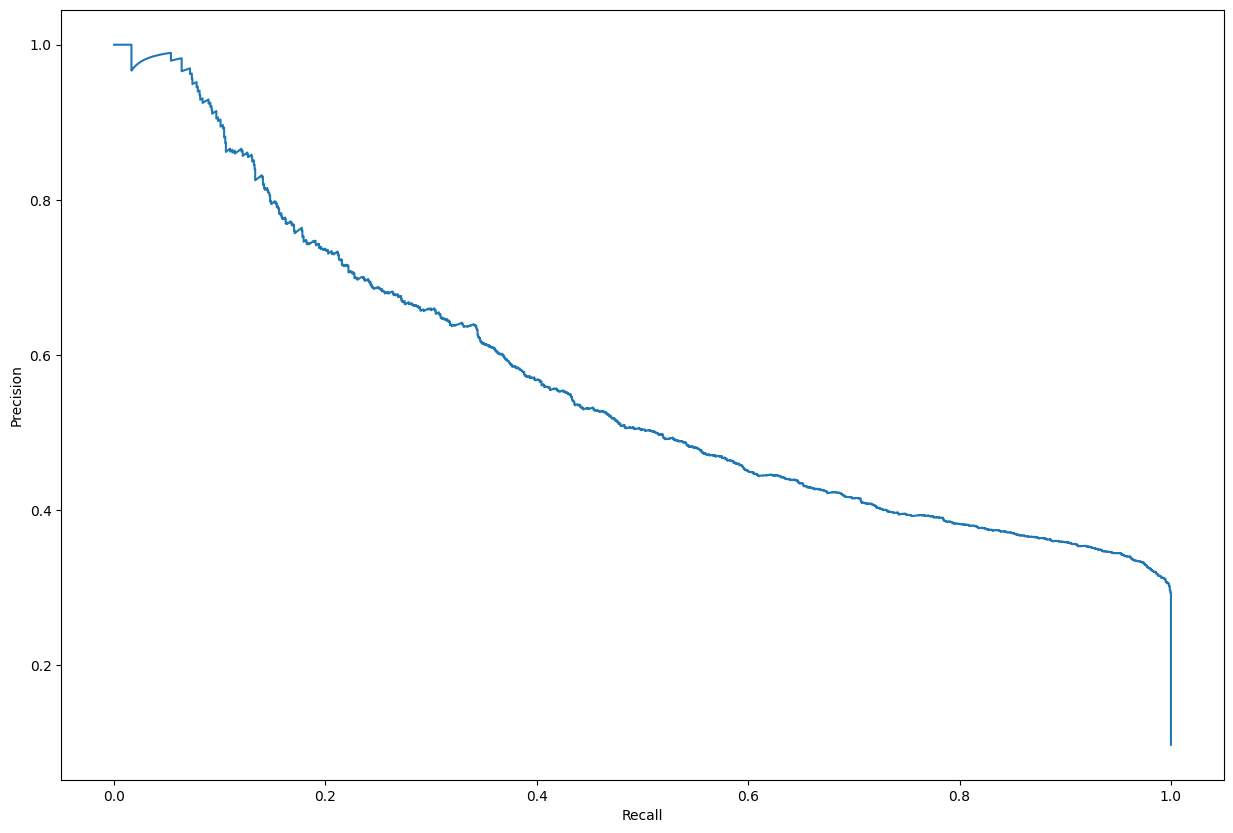

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, positive_proba)

plt.figure(figsize=(15, 10))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")